In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [390]:
df = pd.read_csv("hypothyroid.csv")
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P


In [391]:
len(df.columns)

30

In [392]:
df.isnull().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
TBG                          0
referral source              0
binaryClass                  0
dtype: int64

In [393]:
for i in df.columns:
    print(df[i].value_counts())

59     95
60     91
70     90
73     81
55     81
       ..
10      1
4       1
?       1
6       1
455     1
Name: age, Length: 94, dtype: int64
F    2480
M    1142
?     150
Name: sex, dtype: int64
f    3308
t     464
Name: on thyroxine, dtype: int64
f    3722
t      50
Name: query on thyroxine, dtype: int64
f    3729
t      43
Name: on antithyroid medication, dtype: int64
f    3625
t     147
Name: sick, dtype: int64
f    3719
t      53
Name: pregnant, dtype: int64
f    3719
t      53
Name: thyroid surgery, dtype: int64
f    3713
t      59
Name: I131 treatment, dtype: int64
f    3538
t     234
Name: query hypothyroid, dtype: int64
f    3535
t     237
Name: query hyperthyroid, dtype: int64
f    3754
t      18
Name: lithium, dtype: int64
f    3738
t      34
Name: goitre, dtype: int64
f    3676
t      96
Name: tumor, dtype: int64
f    3771
t       1
Name: hypopituitary, dtype: int64
f    3588
t     184
Name: psych, dtype: int64
t    3403
f     369
Name: TSH measured, dtype: int64
?     

In [394]:
df.drop("TBG", axis = 1, inplace = True)

In [395]:
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,2.5,t,125,t,1.14,t,109,f,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,2,t,102,f,?,f,?,f,other,P
2,46,M,f,f,f,f,f,f,f,f,...,?,t,109,t,0.91,t,120,f,other,P
3,70,F,t,f,f,f,f,f,f,f,...,1.9,t,175,f,?,f,?,f,other,P
4,70,F,f,f,f,f,f,f,f,f,...,1.2,t,61,t,0.87,t,70,f,SVI,P


In [396]:
col = ["age", "TSH", "TT4", "T4U", "FTI", "T3"]
for i in col:
    df[i] = df[i].replace("?", np.nan)

In [397]:
df = df.fillna(df.median())

In [398]:
col = ["age", "TSH", "TT4", "T4U", "FTI", "T3"]
for i in col:
    df[i] = df[i].astype("float")

In [399]:
numerical = [i for i in df.columns if df[i].dtype != 'O']
categorical = [i for i in df.columns if df[i].dtype == 'O']

In [400]:
numerical

['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

In [401]:
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,referral source,binaryClass
0,41.0,F,f,f,f,f,f,f,f,f,...,2.5,t,125.0,t,1.14,t,109.0,f,SVHC,P
1,23.0,F,f,f,f,f,f,f,f,f,...,2.0,t,102.0,f,0.98,f,107.0,f,other,P
2,46.0,M,f,f,f,f,f,f,f,f,...,2.0,t,109.0,t,0.91,t,120.0,f,other,P
3,70.0,F,t,f,f,f,f,f,f,f,...,1.9,t,175.0,f,0.98,f,107.0,f,other,P
4,70.0,F,f,f,f,f,f,f,f,f,...,1.2,t,61.0,t,0.87,t,70.0,f,SVI,P


In [402]:
df.describe()

,age,TSH,T3,TT4,T4U,FTI
count,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000
mean,51.736479,4.726104,2.010748,107.993584,0.993461,110.115509
std,20.082329,23.316598,0.738282,34.520088,0.185212,31.372681
min,1.000000,0.005000,0.050000,2.000000,0.250000,2.000000
25%,36.000000,0.600000,1.700000,89.000000,0.890000,94.000000
50%,54.000000,1.400000,2.000000,103.000000,0.980000,107.000000
75%,67.000000,2.425000,2.200000,123.000000,1.070000,121.250000
max,455.000000,530.000000,10.600000,430.000000,2.320000,395.000000


In [403]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3772 non-null   float64
 1   sex                        3772 non-null   object 
 2   on thyroxine               3772 non-null   object 
 3   query on thyroxine         3772 non-null   object 
 4   on antithyroid medication  3772 non-null   object 
 5   sick                       3772 non-null   object 
 6   pregnant                   3772 non-null   object 
 7   thyroid surgery            3772 non-null   object 
 8   I131 treatment             3772 non-null   object 
 9   query hypothyroid          3772 non-null   object 
 10  query hyperthyroid         3772 non-null   object 
 11  lithium                    3772 non-null   object 
 12  goitre                     3772 non-null   object 
 13  tumor                      3772 non-null   objec

In [404]:
for i in df.columns:
    print(df[i].value_counts())

59.0     95
60.0     91
70.0     90
55.0     81
73.0     81
         ..
455.0     1
6.0       1
4.0       1
10.0      1
5.0       1
Name: age, Length: 93, dtype: int64
F    2480
M    1142
?     150
Name: sex, dtype: int64
f    3308
t     464
Name: on thyroxine, dtype: int64
f    3722
t      50
Name: query on thyroxine, dtype: int64
f    3729
t      43
Name: on antithyroid medication, dtype: int64
f    3625
t     147
Name: sick, dtype: int64
f    3719
t      53
Name: pregnant, dtype: int64
f    3719
t      53
Name: thyroid surgery, dtype: int64
f    3713
t      59
Name: I131 treatment, dtype: int64
f    3538
t     234
Name: query hypothyroid, dtype: int64
f    3535
t     237
Name: query hyperthyroid, dtype: int64
f    3754
t      18
Name: lithium, dtype: int64
f    3738
t      34
Name: goitre, dtype: int64
f    3676
t      96
Name: tumor, dtype: int64
f    3771
t       1
Name: hypopituitary, dtype: int64
f    3588
t     184
Name: psych, dtype: int64
t    3403
f     369
Name: TSH measure

In [405]:
df["sex"] = df["sex"].replace("?", df["sex"].mode()[0])
df["hypopituitary"] = df["hypopituitary"].replace("t", "f")

In [406]:
for i in df.columns:
    print(df[i].value_counts())

59.0     95
60.0     91
70.0     90
55.0     81
73.0     81
         ..
455.0     1
6.0       1
4.0       1
10.0      1
5.0       1
Name: age, Length: 93, dtype: int64
F    2630
M    1142
Name: sex, dtype: int64
f    3308
t     464
Name: on thyroxine, dtype: int64
f    3722
t      50
Name: query on thyroxine, dtype: int64
f    3729
t      43
Name: on antithyroid medication, dtype: int64
f    3625
t     147
Name: sick, dtype: int64
f    3719
t      53
Name: pregnant, dtype: int64
f    3719
t      53
Name: thyroid surgery, dtype: int64
f    3713
t      59
Name: I131 treatment, dtype: int64
f    3538
t     234
Name: query hypothyroid, dtype: int64
f    3535
t     237
Name: query hyperthyroid, dtype: int64
f    3754
t      18
Name: lithium, dtype: int64
f    3738
t      34
Name: goitre, dtype: int64
f    3676
t      96
Name: tumor, dtype: int64
f    3772
Name: hypopituitary, dtype: int64
f    3588
t     184
Name: psych, dtype: int64
t    3403
f     369
Name: TSH measured, dtype: int64
1.4 

In [407]:
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,referral source,binaryClass
0,41.0,F,f,f,f,f,f,f,f,f,...,2.5,t,125.0,t,1.14,t,109.0,f,SVHC,P
1,23.0,F,f,f,f,f,f,f,f,f,...,2.0,t,102.0,f,0.98,f,107.0,f,other,P
2,46.0,M,f,f,f,f,f,f,f,f,...,2.0,t,109.0,t,0.91,t,120.0,f,other,P
3,70.0,F,t,f,f,f,f,f,f,f,...,1.9,t,175.0,f,0.98,f,107.0,f,other,P
4,70.0,F,f,f,f,f,f,f,f,f,...,1.2,t,61.0,t,0.87,t,70.0,f,SVI,P


In [408]:
numerical

['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

In [409]:
categorical

['sex',
 'on thyroxine',
 'query on thyroxine',
 'on antithyroid medication',
 'sick',
 'pregnant',
 'thyroid surgery',
 'I131 treatment',
 'query hypothyroid',
 'query hyperthyroid',
 'lithium',
 'goitre',
 'tumor',
 'hypopituitary',
 'psych',
 'TSH measured',
 'T3 measured',
 'TT4 measured',
 'T4U measured',
 'FTI measured',
 'TBG measured',
 'referral source',
 'binaryClass']

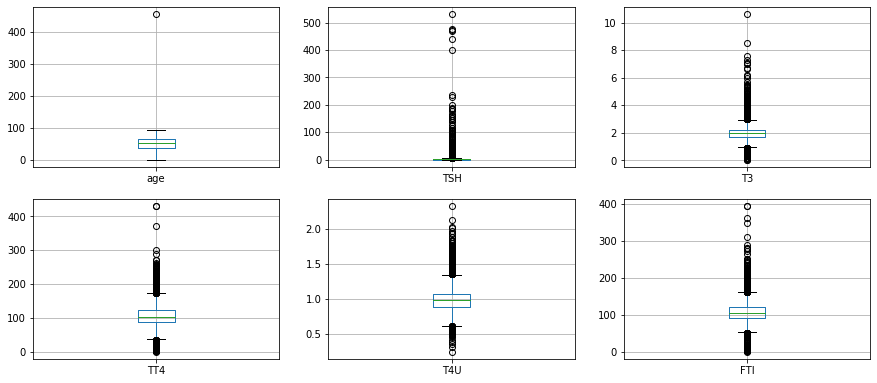

In [410]:
plt.figure(figsize = (15, 10))

for i in range(1, len(numerical)+1):
    plt.subplot(3,3,i)
    fig = df.boxplot(column = numerical[i-1])
    # fig.set_title("Pregnancies")

In [411]:
for i in range(1, len(numerical)+1):
    
    iqr = df[numerical[i-1]].quantile(0.75) - df[numerical[i-1]].quantile(0.25)
    min_val = df[numerical[i-1]].quantile(0.25) - (iqr * 1.5)
    max_val = df[numerical[i-1]].quantile(0.75) + (iqr * 1.5)
    df[numerical[i-1]] = np.where(df[numerical[i-1]] > max_val, max_val, df[numerical[i-1]])
    df[numerical[i-1]] = np.where(df[numerical[i-1]] < min_val, min_val, df[numerical[i-1]])



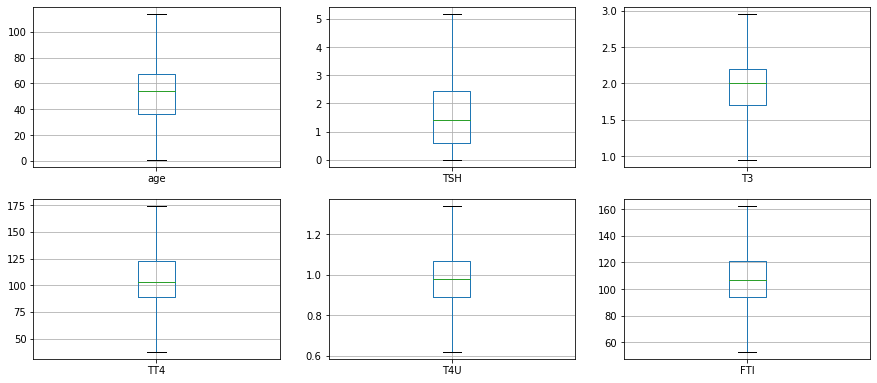

In [412]:
plt.figure(figsize = (15, 10))

for i in range(1, len(numerical)+1):
    plt.subplot(3,3,i)
    fig = df.boxplot(column = numerical[i-1])
    # fig.set_title("Pregnancies")

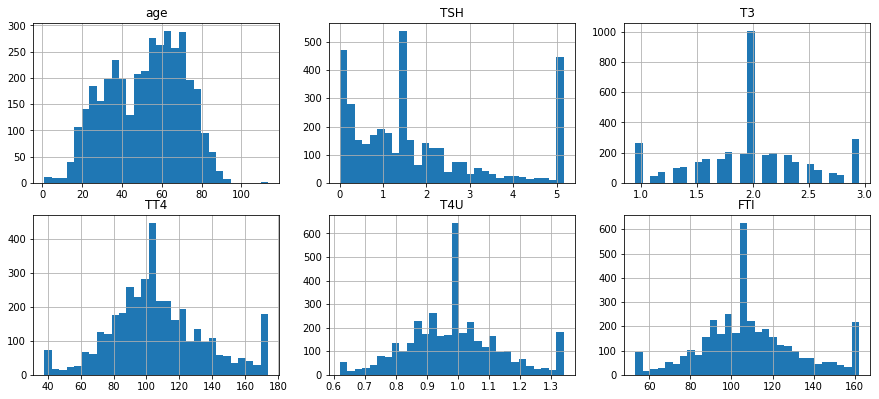

In [413]:
plt.figure(figsize = (15, 10))

for i in range(1, len(numerical)+1):
    plt.subplot(3,3,i)
    fig = df[numerical[i-1]].hist(bins = 30)
    fig.set_title(numerical[i-1])


In [414]:
x = df.drop("binaryClass", axis = 1)
y = df["binaryClass"]

In [415]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state = 0)

In [416]:
for i in xtrain.columns:
    print(xtrain[i].value_counts().sum())

2829
2829
2829
2829
2829
2829
2829
2829
2829
2829
2829
2829
2829
2829
2829
2829
2829
2829
2829
2829
2829
2829
2829
2829
2829
2829
2829
2829


In [417]:
for i in xtest.columns:
    print(xtest[i].value_counts().sum())

943
943
943
943
943
943
943
943
943
943
943
943
943
943
943
943
943
943
943
943
943
943
943
943
943
943
943
943


In [418]:
# for i in ytrain.columns:
print(ytrain.value_counts())

P    2622
N     207
Name: binaryClass, dtype: int64


In [419]:
# for i in ytest.columns:
print(ytest.value_counts())

P    859
N     84
Name: binaryClass, dtype: int64


In [420]:
skew = ['TSH', 'T3', 'TT4', 'T4U', 'FTI']
# plt.figure(figsize = (15, 10))

# for i in range(1, len(skew)+1):
#     plt.subplot(3,3,i)
#     xtrain[skew[i-1]] = stats.boxcox(xtrain[skew[i-1]])[0]
#     xtest[skew[i-1]] = stats.boxcox(xtest[skew[i-1]])[0]
#     fig = xtrain[skew[i-1]].hist(bins = 30)
#     fig.set_title(numerical[i-1])
    
# for i in range(1, len(skew)+1):
#     plt.subplot(3,3,i)
#     xtrain[skew[i-1]] = np.log(xtrain[skew[i-1]])
#     xtest[skew[i-1]] = np.log(xtest[skew[i-1]])
#     fig = xtrain[skew[i-1]].hist(bins = 30)
#     fig.set_title(skew[i-1])    
import category_encoders as ce
encoder = ce.OneHotEncoder(cols=[i for i in categorical[:len(categorical)-1]])
xtrain = encoder.fit_transform(xtrain)
xtest = encoder.fit_transform(xtest)

In [421]:
for i in xtrain.columns:
    if i not in xtest.columns:
        print(i)

In [422]:
from sklearn.preprocessing import StandardScaler
encoder1 = StandardScaler()
xtrain = encoder1.fit_transform(xtrain)
xtest = encoder1.fit_transform(xtest)

In [423]:
# from sklearn.linear_model import LogisticRegression

# logreg = LogisticRegression(solver = "liblinear", random_state = 0)

# logreg.fit(xtrain, ytrain)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [424]:
# y_pred = logreg.predict(xtest)

In [426]:
# from sklearn.metrics import accuracy_score
# accuracy_score(ytest, y_pred)

0.9650053022269353

In [427]:
# train = logreg.score(xtrain, ytrain)
# test = logreg.score(xtest, ytest)

In [428]:
# train, test

(0.9763167196889361, 0.9650053022269353)

In [433]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [434]:
models = []
names = ['LR','Random Forest','DecisionTreeClassifier', "SVM"]

models.append((LogisticRegression()))
models.append((RandomForestClassifier(n_estimators=100)))
# models.append((MLPClassifier()))
# models.append((GaussianNB()))
models.append((DecisionTreeClassifier()))
models.append((SVC()))

In [435]:
from sklearn import model_selection
from sklearn.metrics import accuracy_score

In [437]:
kfold = model_selection.KFold(n_splits=5,random_state=7, shuffle = True)

for i in range(0,len(models)):    
    cv_result = model_selection.cross_val_score(models[i],xtrain,ytrain,cv=kfold,scoring='accuracy')
    score=models[i].fit(xtrain,ytrain)
    prediction = models[i].predict(xtest)
    acc_score = accuracy_score(ytest,prediction)     
    print ('-'*40)
    print ('{0}: {1}'.format(names[i],acc_score))

----------------------------------------
LR: 0.9650053022269353
----------------------------------------
Random Forest: 0.9300106044538706
----------------------------------------
DecisionTreeClassifier: 0.9300106044538706
----------------------------------------
SVM: 0.9522799575821845
